<hr/>

#Data Mining [EN.550.436]
**Tamás Budavári** - budavari@jhu.edu <br/>
**Class 3** - Sept 8, 2015

<hr/>


<h1><font color="darkblue">Samples, PDFs in 1- and 2-D</font></h1>



### Descriptive Statistics
- Characterization of location, dispersion, etc.

| | Sample Estimates <font color="white">(notations)</font> | Probabilisty Density Functions   |
|--|--------------|-------------|
| **Average** | $\displaystyle\ \bar{x}=\frac{1}{N}\sum_{i=1}^N x_i = \big\langle x_i \big\rangle_{i=1}^N$ | $\displaystyle\ \mu = \mathbb{E}[X] =\!\int\!x\,p(x)dx$| 
| **Variance** | $\displaystyle\ s^2=\frac{1}{N\!-\!1}\sum_{i=1}^N \big(x_i\!-\!\bar{x}\big)^2 $|  $\displaystyle\ \mathbb{Var}[X] = \int (x\!-\!\mu)^2 p(x)dx$| 

- Useful connection to sampling

### Sampling from distributions
- Uniform between $a$ and $b$: scale and shift

>$\displaystyle U_{ab} = a + (b\!-\!a)\,U_{01} $

- Inverse transform sampling in $\mathbb{R}$

>$\displaystyle X = \mathrm{CDF}^{-1}(U_{01}) $


- Rejection sampling in $\mathbb{R}^N$, see animation

<img src="files/anim.gif" align=left>
<!--<img src="http://dl.dropbox.com/u/27415200/anim.gif">-->




### Numerical Methods
If the $\left\{x_i\right\}$ set is sampled from the probability density function $p(\cdot)$,
the following will be true:
- Average

>$\displaystyle\mathbb{E}[X] =\!\int x\ p(x)\,dx  \ \approx\ \frac{1}{N}\sum_i x_i $

- Variance

>$\displaystyle\mathbb{E}[(X\!-\!\mu)^2]=\int (x\!-\!\mu)^2\ p(x)\,dx \approx \frac{1}{N}\sum_i (x_i\!-\!\mu)^2$

> compare to
 
>$\displaystyle\ s^2=\frac{1}{N\!-\!1}\sum_{i=1}^N \big(x_i\!-\!\bar{x}\big)^2 $

> Bessel correction: $N\!-\!1$ independent $(x_i\!-\!\bar{x})$ differences

>$\displaystyle \sum_{i=1}^N (x_i\!-\!\bar{x}) =\ ???$ <font color="white">.... 0 ...</font>


In [18]:
%pylab inline 
from scipy.stats import norm as gaussian

Populating the interactive namespace from numpy and matplotlib


In [19]:
# generate sample with size N
mu, sigma, N = 0, 1, 10
x = gaussian.rvs(mu, sigma, N)

avg = np.mean(x)
# variance estimates
s2   = np.sum( (x-avg)**2 ) /(N-1)  # correct
s2n  = np.sum( (x-avg)**2 ) / N     # biased 
s2k  = np.sum( (x- mu)**2 ) / N     # known mean
# standard deviation estimates
sqrt(s2), sqrt(s2n), sqrt(s2k) 

(0.8380655748766882, 0.79505881355661634, 0.8324983844924847)

(1.0920895172590042, 0.9767945592424252, 0.94794116064014888)

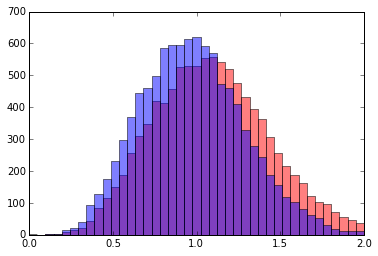

In [20]:
# generate M runs with N samples each
mu, sigma, N, M = 0, 1, 5, 10000
X = gaussian.rvs(loc=mu, scale=sigma, size=(N,M))

avg = np.mean(x, axis=0)
# variance estimates
s2   = np.sum( (X-avg)**2, axis=0) /(N-1) # correct
s2n  = np.sum( (X-avg)**2, axis=0) / N    # biased
s2k  = np.sum( (X- mu)**2, axis=0) / N    # known mean
# standard deviation estimates
s, sn, sk = sqrt(s2), sqrt(s2n), sqrt(s2k)

hist(s , 41, range=[0,2], color='r', alpha=0.5);
hist(sn, 41, range=[0,2], color='b', alpha=0.5);
mean(s), mean(sn), mean(sk)

### Density Estimation
- Histograms
    - Width of bins, $h$
    - Start of bin boundary, $x_0$

 >$\displaystyle \mathrm{Hist}(x) \propto \frac{1}{N}\sum_i \mathbb{1}_{\mathrm{bin}(x_i;x_0,h)}(x)$
        
- Kernel Density Estimation (KDE)
    - Bandwidth $h$
   
 >$\displaystyle \mathrm{KDE}(x) = \frac{1}{N}\sum_i K_h(x\!-\!x_i) = \frac{1}{Nh}\sum_i K\left(\frac{x\!-\!x_i}{h}\right)$
   
    - Can use different $K(\cdot)$ kernel functions
        - E.g., Uniform, Triangular, Gauss, Epanechnikov

See animations at
http://www.mglerner.com/blog/?p=28


### Kernel Function
- Finite vs Infinite support
- Numerical evaluations
- Frequently used kernels

<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Kernels.svg" alt="All of the above kernels in a common coordinate system"  width="350" align=left>



### Dependence
- Consider random variables $X$, $Y\in\mathbb{R}$

> We can look at them separately but ...
>
> Are they "related" at all?

- Dependent variables

>$\displaystyle P(X Y) \neq P(X)\,P(Y)$ 
> 
>More on this later...

### Covariance

- Definition 

>$\displaystyle \mathbb{Cov}[X,Y]=\mathbb{E}\Big[\big(X-\mathbb{E}[X]\big)\big(Y-\mathbb{E}[Y]\big)\Big]$  
>
> Other notations: $\mathrm{C}_{X,Y}$, $\sigma(X,Y)$, ...

- Sample covariance

>$\displaystyle C = \frac{1}{N\!-\!1}\sum_{i=1}^N (x_i-\bar{x})(y_i-\bar{y})$

### Correlation

- Definition

>$\displaystyle \mathbb{Corr}[X,Y] = \frac{\mathbb{Cov}[X,Y]}{\sqrt{\mathbb{Var}[X]\, \mathbb{Var}[Y]}}$
>
> Takes values in $[-1,1]$ (Cauchy-Schwartz inequality)
>
> Other notations: $\rho$, $r$, ...

- Sample correlation

> ...

### Examples

<img src="files/Correlation_coefficient.png" width=500 align="left">

### Quiz

1) If $X$ and $Y$ are independent, are they also uncorrelated?

        [ ] Yes      [ ] No
        
2) If $X$ and $Y$ are uncorrelated, are they also independent?

        [ ] Yes      [ ] No